<a href="https://colab.research.google.com/github/skadoosh4/trained_models/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import PyTorch

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
##1. Getting a dataset

train_data = datasets.FashionMNIST(
    root = "data" , #Where to download the data to
    train = True, # Do we want the training data
    download= True , #do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), #How do we want to transform the data
    target_transform= None , # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
image , label  = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"Image shape : {image.shape} | Image label : {class_names[label]}")

Image shape : torch.Size([1, 28, 28]) | Image label : Ankle boot


### 1.2 Visualizing the data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

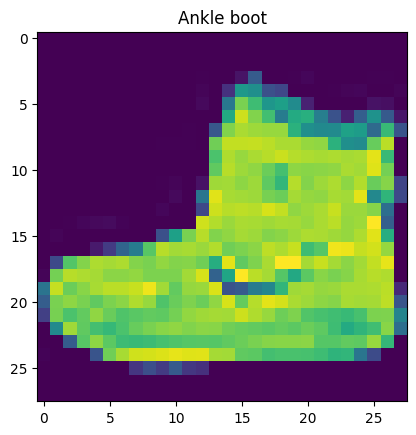

In [ ]:
image , label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(dim=0)) #Squeezes the dim of size 1. Also just squeeze() will work as well
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

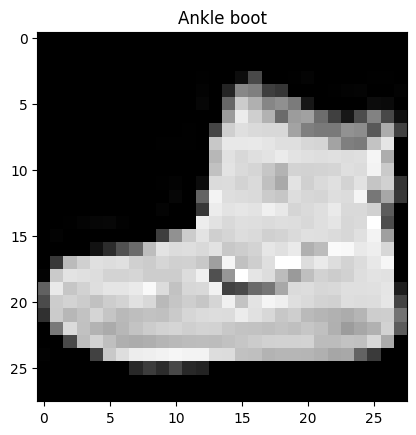

In [ ]:
plt.imshow(image.squeeze() , cmap='gray')
plt.title(class_names[label])

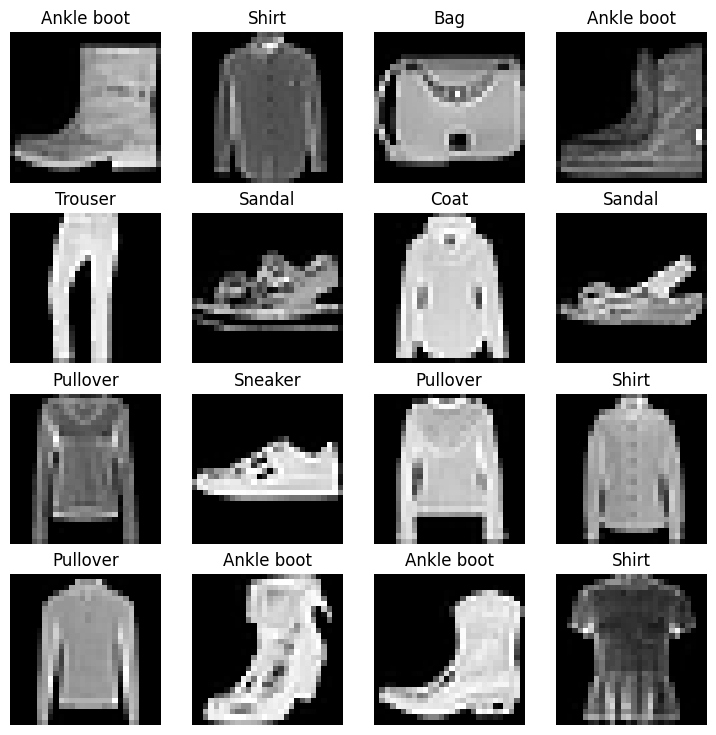

In [ ]:
#Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows , cols = 4 , 4
for i in range(1 , rows*cols+1):
  random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
  image , label = train_data[random_idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(image.squeeze(dim=0) , cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

# 2. Prepare Data Loader

Right now, our data is in form of PyTorch Datasets

DataLoader turns our datasets into Python iterable

More specifically , we want to turn our data into batches(or mini-batches)

Why would we do this?
1. It is more computationally efficient , as in , your computing hardware may not be able to look at 60000 images in one hit
2. It gives our neural network more chances to update its gradient per epoch

In [ ]:
from torch.utils.data import DataLoader

#Setup the batches size hyperparameters
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False)



In [ ]:
#Let's check out what we've created

print(f"DataLoaders : {train_dataloader , test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7d60a6382c50>, <torch.utils.data.dataloader.DataLoader object at 0x7d60a63904c0>)
Length of the train_dataloader: 1875 batches of 32...
Length of test_dataloader : 313 batches of 32


In [ ]:
#Check out what's inside the training dataloader

train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 8 , label size : torch.Size([])


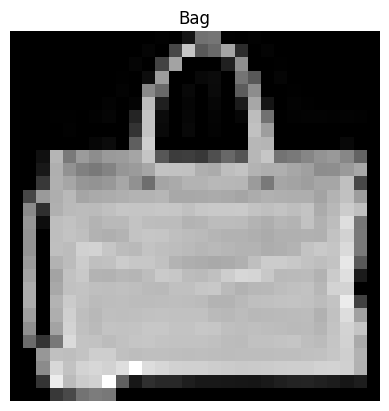

In [ ]:
#Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch) , size = [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(dim=0) , cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label} , label size : {label.shape}")

##3. Model 0 : Build a baseline model

In [ ]:
#Create a flatten layer

flatten_model = nn.Flatten()

#Get a single sample

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening : {x.shape} -> [color_channels , height , width]")
print(f"Shape after flattening : {output.shape} -> [color_channels , height*width]")
output.squeeze(dim=0)

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels , height , width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels , height*width]


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape : int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features= output_shape)
    )

  def forward(self , x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#Setup model parameters

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1 , 28 , 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

3.1 Setup Loss, optimizer and evaluation matrix

Loss Function : `nn.CrossEntropyLoss()`
OPtimizer : `torch.optim.SGD()`
evaluation metrix : `Since we're using classification model we can use Accuracy`

In [ ]:
import requests
from pathlib import Path

#Download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("Helper functions already exists")
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

Helper functions already exists


In [ ]:
from helper_functions import accuracy_fn

#Setup Loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments


In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                    end: float,
                    device: torch.device = None):
  total_time = end-start
  print(f"TRain time on {device} : {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()

print_train_time(start=start_time , end = end_time , device="cpu")

TRain time on cpu : 0.000 seconds


5.609900000536072e-05

## 3.3 Creating a training loop and training a model on the train data

1. Loop through epochs
2. Loop through training batches , perform training steps, calculate the train loss *per batch*
3. Loop through testing batches , perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [ ]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs
epochs = 3

#Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epochs : {epoch}\n---------")
  #training
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    #Forward pass
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)

    train_loss = train_loss + loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  #Divide total train_loss by length of train dataloader
  train_loss /= len(train_dataloader)

  test_loss , test_acc = 0 , 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #Forward pass
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred , y_test)

      test_acc += accuracy_fn(y_true=y_test , y_pred=test_pred.argmax(dim=1))

    #calculate the test_loss avergae per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  #Print
  print(f"\n Train Loss: {train_loss:.4f} | Test Loss : {test_loss:.4f} | Test acc : {test_acc:.2f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs : 0
---------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss: 0.5904 | Test Loss : 0.5095 | Test acc : 82.04
Epochs : 1
---------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss: 0.4763 | Test Loss : 0.4799 | Test acc : 83.20
Epochs : 2
---------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss: 0.4550 | Test Loss : 0.4766 | Test acc : 83.43
TRain time on cpu : 33.631 seconds


## 4. Make predictions and get Model 0 result

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

#Building a model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units: int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self , x):
    return self.layer_stack(x)

In [ ]:
#Create an instance of model 1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2 Functionizing training and evaluation/testing loops

In [ ]:
def train_step(model : torch.nn.Module,
               data_loader :torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss , train_acc = 0 , 0

  #Put model into training mode
  model.train()

  for batch , (X,y) in enumerate(data_loader):
    #Put data on target device
    X , y = X.to(device) , y.to(device)

    #Forward pass
    y_pred = model(X)

    #Calculate loss for this batch
    loss = loss_fn(y_pred , y)

    #Add to the total training loss
    train_loss += loss

    #Calculate accuracy for this batch
    acc = accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # Go from logits -> prediction labels

    #Add to the total training loss
    train_acc += acc

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  train_loss /= len(data_loader)

  train_acc /= len(data_loader)

  print(f"Train Loss : {train_loss:.5f} | Train Acc : {train_acc:.2f}%\n")

In [ ]:
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):

  """ Perform a testing with model trying to test on data loader"""
  test_loss , test_acc = 0 , 0

  #Put model in eval mode
  model.eval()

  #Use the inference mode
  with torch.inference_mode():
    for X , y in data_loader:

      #Put data on the target device
      X , y = X.to(device) , y.to(device)

      #Forward Pass
      test_pred = model(X)

      #Calculate test Loss for this batch
      loss = loss_fn(test_pred , y)

      #Add to the total test loss
      test_loss += loss

      #Calculate accuracy for this batch
      acc = accuracy_fn(y_true= y , y_pred = test_pred.argmax(dim=1)) #Go from logits -> prediction labels

      #Add to the total test acc
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss : {test_loss:.5f} | Test Acc : {test_acc : .2f}%\n")

In [ ]:
torch.manual_seed(42)

#Measure time
train_time_start_on_gpu = timer()

#Set epochs
epochs = 8

#Create a optimization and evaluation loop using a train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------------")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn= accuracy_fn,
             device = device)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn= accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                 end = train_time_end_on_gpu,
                                 device = device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0
--------------
Train Loss : 1.09199 | Train Acc : 61.34%

Test Loss : 0.95636 | Test Acc :  65.00%

Epoch : 1
--------------
Train Loss : 0.78101 | Train Acc : 71.93%

Test Loss : 0.72227 | Test Acc :  73.91%

Epoch : 2
--------------
Train Loss : 0.67027 | Train Acc : 75.94%

Test Loss : 0.68500 | Test Acc :  75.02%

Epoch : 3
--------------
Train Loss : 0.64384 | Train Acc : 76.52%

Test Loss : 0.65079 | Test Acc :  76.13%

Epoch : 4
--------------
Train Loss : 0.62892 | Train Acc : 77.00%

Test Loss : 0.65277 | Test Acc :  75.95%

Epoch : 5
--------------
Train Loss : 0.61576 | Train Acc : 77.41%

Test Loss : 0.64104 | Test Acc :  76.50%

Epoch : 6
--------------
Train Loss : 0.60668 | Train Acc : 77.78%

Test Loss : 0.62651 | Test Acc :  76.61%

Epoch : 7
--------------
Train Loss : 0.45148 | Train Acc : 83.94%

Test Loss : 0.45020 | Test Acc :  84.39%

TRain time on cpu : 92.799 seconds


In [ ]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
  loss , acc = 0 , 0

  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      X , y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))

    #Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc " : acc}

In [ ]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45019951462745667,
 'model_acc ': 84.39496805111821}

#Create a convolutional neural network

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self , x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

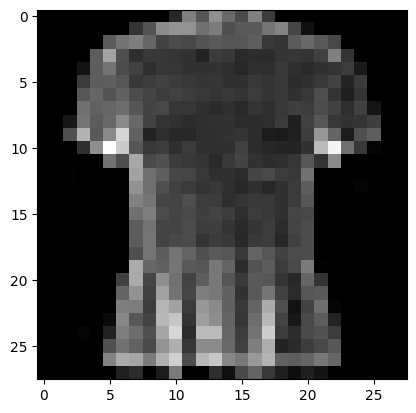

In [ ]:
plt.imshow(image.squeeze() , cmap='gray')

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(image.unsqueeze(dim=0))

tensor([[ 0.0300, -0.0610,  0.0485, -0.0278, -0.0125,  0.0172, -0.0056, -0.0121,
          0.0243,  0.0095]], grad_fn=<AddmmBackward0>)

###Stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n  {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
  tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
torch.manual_seed(42)
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride = 1,
                       padding = 1)
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [ ]:
print(f"Test Image shape : {test_image.shape}")
print(f"Output Image shape : {conv_output.shape}")

Test Image shape : torch.Size([3, 64, 64])
Output Image shape : torch.Size([10, 64, 64])


###7.2 Stepping though nn.MaxPool2d()

In [ ]:
#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass data
test_image_conv = conv_layer(test_image)
print(f"Shape after conv layer : {test_image_conv.shape}")
test_image_max_pool = max_pool_layer(test_image_conv)
print(f"Shape after conv layer and max pool layer : {test_image_max_pool.shape}")

Shape after conv layer : torch.Size([10, 64, 64])
Shape after conv layer and max pool layer : torch.Size([10, 32, 32])


#7.3 Setup a Loss function and optimizer for *model_2*

In [ ]:
#Setup Loss function/eval metrics/optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_model_2 = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n------------")
  train_step(model = model_2,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn= accuracy_fn,
            device = device)

  train_time_end_model_2 = timer()

  total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
------------
Train Loss : 0.59518 | Train Acc : 78.38%

Test Loss : 0.39500 | Test Acc :  85.99%

TRain time on cpu : 59.215 seconds
Epoch : 1
------------
Train Loss : 0.36536 | Train Acc : 86.90%

Test Loss : 0.35244 | Test Acc :  86.91%

TRain time on cpu : 112.799 seconds
Epoch : 2
------------
Train Loss : 0.32588 | Train Acc : 88.13%

Test Loss : 0.32719 | Test Acc :  88.07%

TRain time on cpu : 164.364 seconds
Epoch : 3
------------
Train Loss : 0.30489 | Train Acc : 88.92%

Test Loss : 0.32312 | Test Acc :  88.25%

TRain time on cpu : 215.963 seconds
Epoch : 4
------------
Train Loss : 0.28981 | Train Acc : 89.56%

Test Loss : 0.30836 | Test Acc :  88.91%

TRain time on cpu : 267.815 seconds
Epoch : 5
------------
Train Loss : 0.27944 | Train Acc : 89.82%

Test Loss : 0.29993 | Test Acc :  89.37%

TRain time on cpu : 319.567 seconds
Epoch : 6
------------
Train Loss : 0.27027 | Train Acc : 90.09%

Test Loss : 0.31035 | Test Acc :  88.80%

TRain time on cpu : 371.487 s

In [ ]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc ': 89.30710862619809}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,0.450200,84.394968
1,FashionMNISTModelV2,0.314206,89.307109


In [ ]:
#Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV1,0.450200,84.394968,92.798569
1,FashionMNISTModelV2,0.314206,89.307109,527.425323


###9. Make and evalurate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data : list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample
      sample = torch.unsqueeze(sample , dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze() , dim=0)

      pred_probs.append(pred_prob.cpu())

  #Stack the pred_prob to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample , label in random.sample(list(test_data) , k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

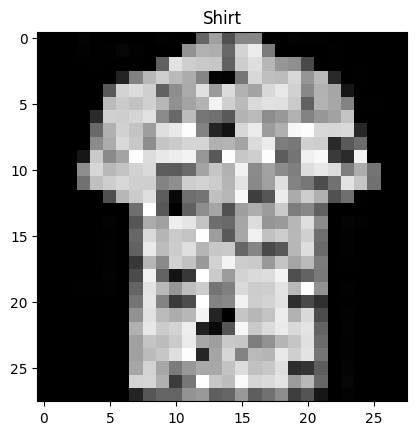

In [ ]:
plt.imshow(test_samples[0].squeeze(dim=0) , cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples,
                              device =device)

#View first two prediction
pred_probs[:2]

tensor([[2.8241e-02, 4.8080e-07, 2.2627e-05, 1.6891e-03, 1.8762e-04, 2.8766e-08,
         9.6869e-01, 1.2696e-08, 1.1643e-03, 2.2142e-09],
        [3.7609e-06, 9.9994e-01, 4.4066e-07, 3.1715e-05, 4.1619e-06, 5.5314e-06,
         1.2277e-06, 2.8943e-06, 1.1973e-06, 9.5260e-06]])

In [ ]:
#Covert pred probs to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 1, 9, 4, 4, 7, 0, 2, 0])

In [ ]:
test_labels

[6, 1, 9, 4, 4, 7, 0, 2, 0]

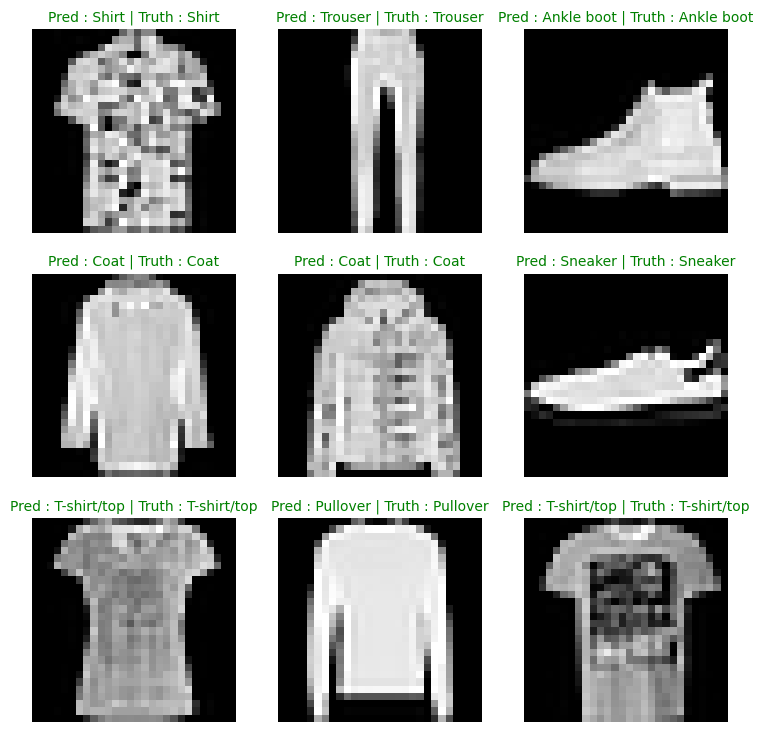

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows , ncols , i+1)

  #Plot the target image
  plt.imshow(sample.squeeze(dim=0) ,cmap='gray')

  #Find the prediction (in text form , e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  #Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"Pred : {pred_label} | Truth : {truth_label}"

  #Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text , fontsize=10 , c='g')
  else:
    plt.title(title_text , fontsize = 10 , c='r')

  plt.axis(False)


## Make confusion matrix for evaluation

In [ ]:
import mlxtend

In [ ]:
##Make predictions with trained model

y_preds = []

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader , desc="Making predictions....."):
    X , y = X.to(device) , y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze() , dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 7])

In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 8.7 MB/s eta 0:00:00


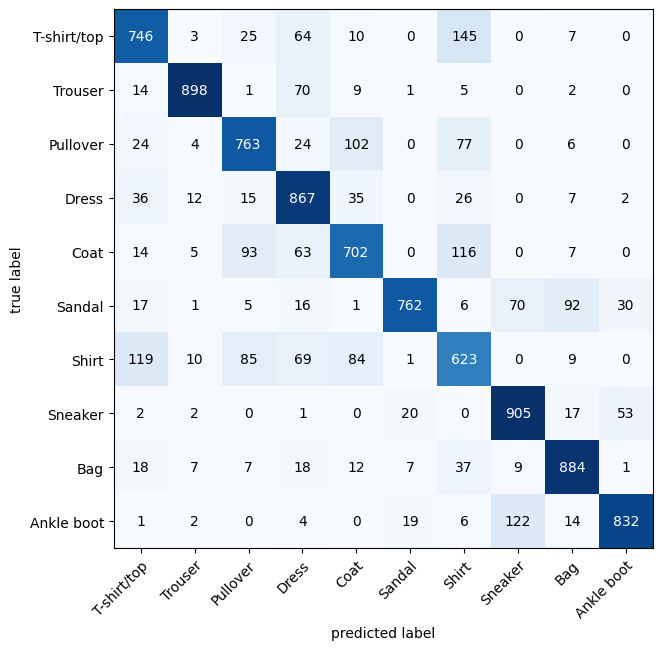

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targets

confmat = ConfusionMatrix(task = "multiclass",num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. Plot the confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7)
)

### 11. Save and load best performing model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

MODEL_NAME = "fashionMNIST.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)

In [ ]:
#Create a new instance of the model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units = 10,
                                     output_shape=len(class_names))

#Load in the save state_dict()

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc ': 89.30710862619809}

In [ ]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
                                    device = device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc ': 89.30710862619809}

In [ ]:
#Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-02)

tensor(True)